# Problem Statement :
Given the following data, predict which Type does a glass with certain composition belongs to.
(Total 6 discrete Glass Types)

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 

#Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix


In [2]:
data = pd.read_csv('glass.csv')

In [3]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df = data.copy()

In [5]:
df.shape

(214, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [8]:
map_type = {
    1 : 1,
    2 : 2,
    3 : 3,
    5 : 4,
    6 : 5,
    7 : 6
}
df['Type'] = df['Type'].map(map_type)

In [10]:
df['Type'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

# Preprocessing

In [11]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

There are no null values

# Exploratory data analysis

## Correlation heatmap

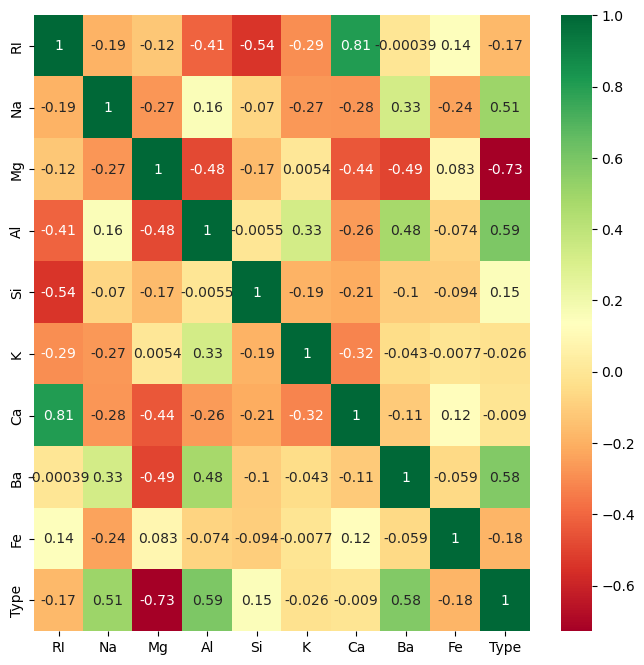

In [15]:
corr = df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

1. Ri and Ca are highly correlated .. hence we can drop 1 of them
2. Ca is less correlated(-0.009) with target.. hence dropping Ca

In [16]:
df.drop(['Ca'], axis=1, inplace=True)
df.head()

,RI,Na,Mg,Al,Si,K,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,0.0,0.0,1


# Check Outliers

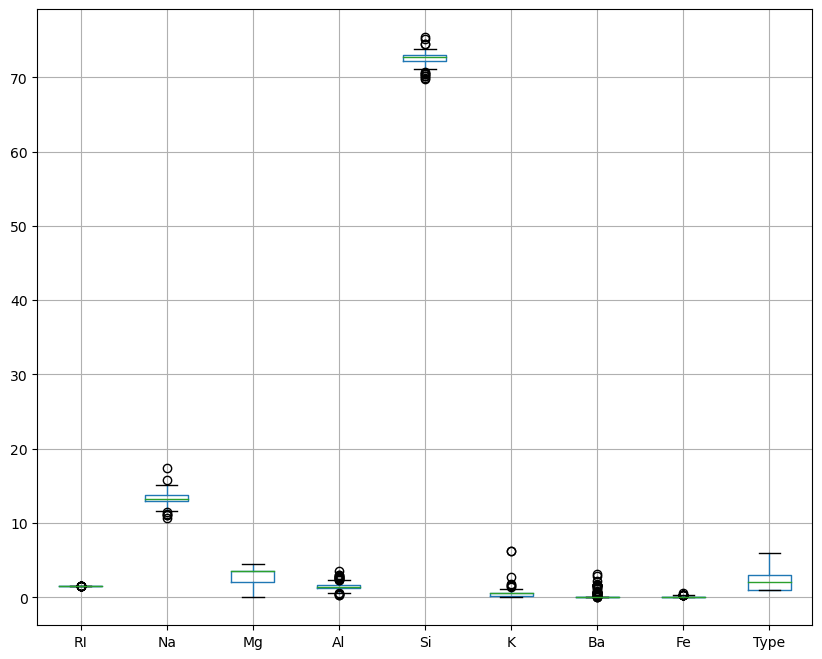

In [18]:
plt.figure(figsize=(10, 8))
df.boxplot()
plt.show()

Na and K seem to have outliers

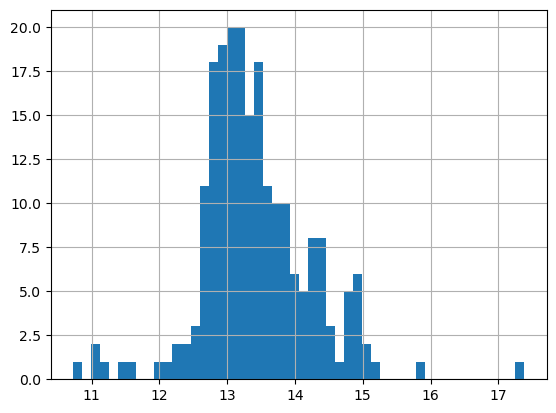

In [19]:
df['Na'].hist(bins=50)
plt.show()

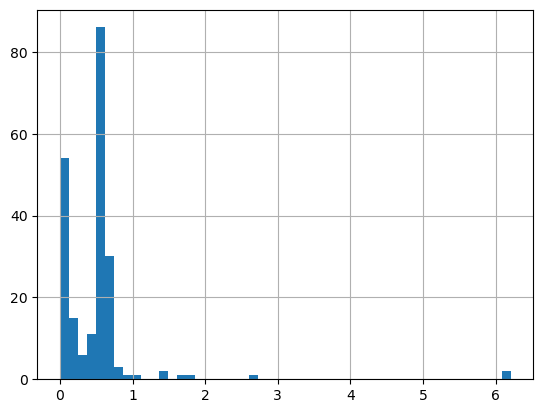

In [20]:
df['K'].hist(bins=50)
plt.show()

# The feature 'Na' follows a Normal Distribution; hence we use 3 Sigma method to handle the outliers


In [21]:
def outilers(df, variable ):
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()
    
    df.loc[df[variable] >= upper_boundary, variable] = upper_boundary

    df.loc[df[variable] <= lower_boundary, variable] = lower_boundary

In [22]:
outilers(df, 'Na')

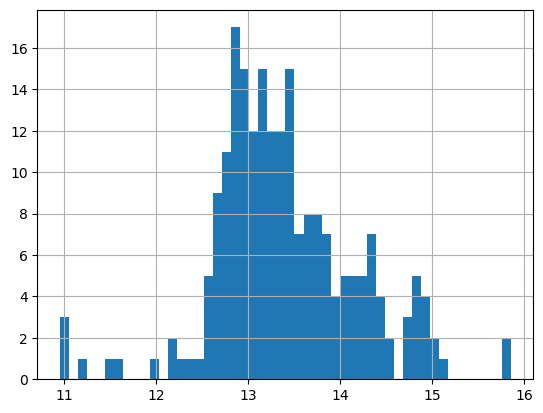

In [23]:
df['Na'].hist(bins=50)
plt.show()

# The feature 'K' follows a Skewed Distribution; hence we use Inter-Quartile (IQR) method to handle the outliers


In [24]:

def iqr_outliers(df, variable) :
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)

    iqr = q3 - q1

    lower_boundary = q1 - 1.5 * q1
    upper_boundary = q3 + 1.5 * q3
    
    df.loc[df[variable] >= upper_boundary, variable] = upper_boundary

    df.loc[df[variable] <= lower_boundary, variable] = lower_boundary

In [25]:

iqr_outliers(df, 'K')

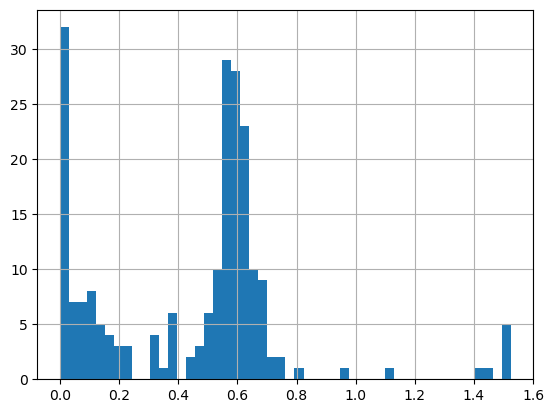

In [26]:
df['K'].hist(bins=50)
plt.show()

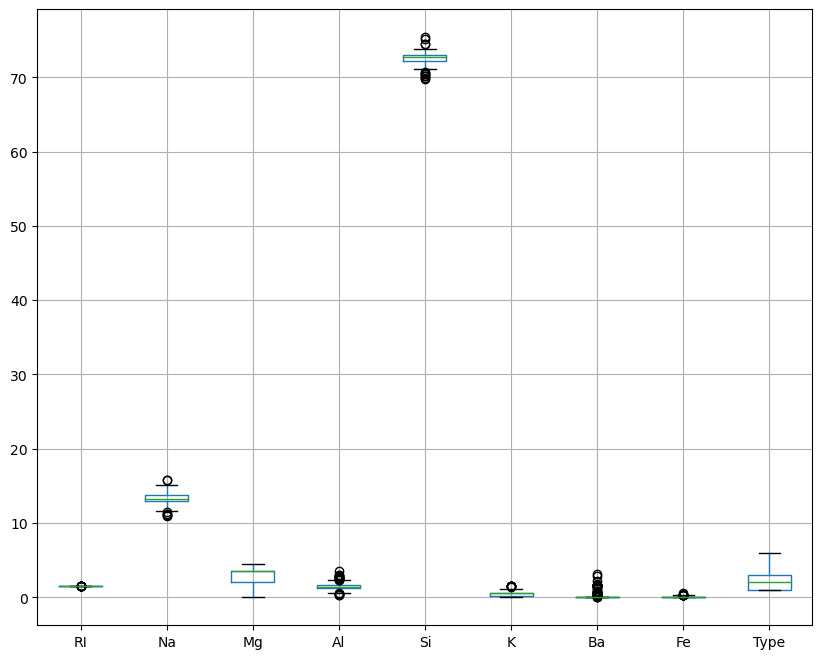

In [27]:
plt.figure(figsize=(10, 8))

df.boxplot()
plt.show()

# Train test split

In [28]:
X = df.copy()
X.drop(['Type'], axis=1, inplace=True)
X.head()

,RI,Na,Mg,Al,Si,K,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,0.0,0.0


In [29]:
y = df['Type']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# feature Scaling

In [31]:
sc = StandardScaler()

In [32]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [33]:
#Standardize training dataset
X_train = pd.DataFrame(X_train, columns=X.columns)
X_train.head()

,RI,Na,Mg,Al,Si,K,Ba,Fe
0,-0.917538,-0.115987,0.472879,-0.466150,0.197871,0.299408,-0.350175,-0.559918
1,-0.274581,-1.050378,0.523380,-0.009578,0.707589,0.331111,-0.350175,-0.559918
2,-0.239395,-0.218386,0.429592,-0.217111,0.222735,0.394518,-0.350175,-0.559918
3,-0.664834,0.037612,0.545024,-0.383137,0.284896,0.679847,-0.350175,-0.559918
4,-0.636045,-0.807180,0.040008,0.011175,0.856775,0.331111,-0.150020,1.664201


In [34]:
#Standardizing test data
X_test = pd.DataFrame(X_test, columns=X.columns)
X_test.head()

,RI,Na,Mg,Al,Si,K,Ba,Fe
0,-0.167203,-0.567141,0.749976,-0.199795,0.289632,0.493061,-0.386038,0.531193
1,-0.267444,1.602029,-1.624529,1.653772,0.714081,-1.225645,1.433856,-0.644053
2,1.254073,-0.503342,0.782955,-1.126579,-0.837355,-0.652743,-0.386038,1.172236
3,-0.714949,1.793427,-1.624529,1.729428,0.714081,-1.225645,1.378708,0.317512
4,-0.335465,0.351566,0.802742,0.651333,-1.071534,0.704130,-0.386038,-0.644053


# Training Models

## Decision Tree

In [41]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
print(f"Accuracy of DecisionTreeClassifier ", dt.score(X_test, y_test))

Accuracy of DecisionTreeClassifier  0.5492957746478874


## Random forest

In [42]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [40]:
print(f"Accuracy of RandomForestClassifier ", rf.score(X_test, y_test))

Accuracy of RandomForestClassifier  0.7464788732394366


## AdaBoost Model

In [43]:
ab = AdaBoostClassifier()

ab.fit(X_train, y_train)

AdaBoostClassifier()

In [44]:
print('Accuracy of AdaBoost Model  : ', ab.score(X_test, y_test))


Accuracy of AdaBoost Model  :  0.5211267605633803


## 4) Logistic Regression Model


In [45]:
log_r = LogisticRegression()
log_r.fit(X_train, y_train)


LogisticRegression()

In [46]:
print('Accuracy of LogisticRegression Model  : ', log_r.score(X_test, y_test))


Accuracy of LogisticRegression Model  :  0.6197183098591549


# Random forest has highest accuracy

C:\Users\Shubham\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


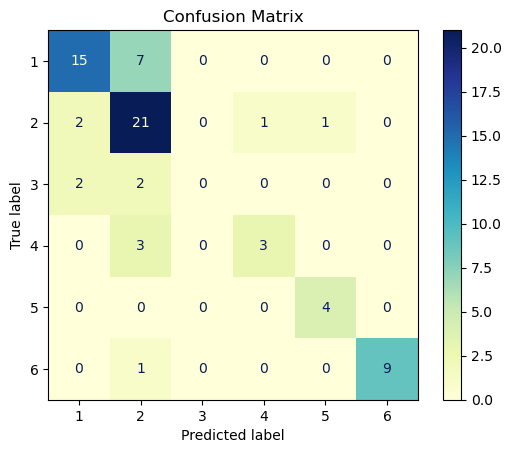

In [65]:
plot_confusion_matrix(rf, X_test, y_test, cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.show()